# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import tensorly as tl
from tensorly.decomposition import tucker
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Loading Data

In [2]:
data = pd.read_csv('ratings.txt')

# Droping NaN values

In [3]:
data=data.dropna()

# Normalizing Ratings

In [4]:
data.head()

,userid,itemid,rating,Time,Location,Companion
148,1003,tt0454876,1,Weekday,Cinema,Alone
149,1003,tt0120912,1,Weekday,Cinema,Alone
150,1003,tt3793764,1,Weekday,Cinema,Alone
151,1003,tt0114148,1,Weekday,Cinema,Alone
152,1003,tt0110357,1,Weekday,Cinema,Alone


In [5]:
data['rating']=data['rating']/5
data.head()

,userid,itemid,rating,Time,Location,Companion
148,1003,tt0454876,0.2,Weekday,Cinema,Alone
149,1003,tt0120912,0.2,Weekday,Cinema,Alone
150,1003,tt3793764,0.2,Weekday,Cinema,Alone
151,1003,tt0114148,0.2,Weekday,Cinema,Alone
152,1003,tt0110357,0.2,Weekday,Cinema,Alone


# Sorting Data by userid and itemid

In [6]:
data = data.sort_values(by=['userid', 'itemid'])

In [7]:
data.head()

,userid,itemid,rating,Time,Location,Companion
723,1001,tt0088763,0.6,Weekend,Cinema,Family
731,1001,tt0088763,0.8,Weekend,Cinema,Partner
721,1001,tt0111161,0.4,Weekend,Cinema,Family
729,1001,tt0111161,0.6,Weekend,Cinema,Partner
737,1001,tt0120338,0.2,Weekend,Home,Alone


# Label Encoding Literal Data

In [8]:
dataplot = data.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataplot.iloc[:,4] = le.fit_transform(dataplot.iloc[:,4])
dataplot.iloc[:,5] = le.fit_transform(dataplot.iloc[:,5])
dataplot.iloc[:,3] = le.fit_transform(dataplot.iloc[:,3])
data2=dataplot.copy()
dataplot.iloc[:,1] = le.fit_transform(dataplot.iloc[:,1])
data2.head()

,userid,itemid,rating,Time,Location,Companion
723,1001,tt0088763,0.6,1,0,1
731,1001,tt0088763,0.8,1,0,2
721,1001,tt0111161,0.4,1,0,1
729,1001,tt0111161,0.6,1,0,2
737,1001,tt0120338,0.2,1,1,0


# Unique Values for each column

In [9]:
user_id = data2['userid'].unique()
item_id = data2['itemid'].unique()
location = data2['Location'].unique()
companion = data2['Companion'].unique()
time = data2['Time'].unique()

# Mapping Dimensions

In [10]:
def mapping(ids):
    count = 0
    keys_u = ids
    map_array = {}
    for i in keys_u:
        map_array[i] = count
        count = count + 1
    return map_array

In [11]:
map_users = mapping(user_id)
map_items = mapping(item_id)
map_loc = mapping(location)
map_tim = mapping(time)
map_com = mapping(companion)

# Creating Tensors

In [12]:
tensor_loc = np.zeros([len(user_id),len(item_id),len(location)])
# 3D TENSOR for location
for i in range(data2.shape[0]):
    idx1 = map_users[data2.iloc[i,0]]
    idx2 = map_items[data2.iloc[i,1]]
    idx3 = map_loc[data2.iloc[i,4]]
    rat = data2.iloc[i,2]
    tensor_loc[idx1,idx2,idx3] = rat

In [13]:
tensor_tim = np.zeros([len(user_id),len(item_id),len(time)])
# 3D TENSOR for time
for i in range(data2.shape[0]):
    idx1 = map_users[data2.iloc[i,0]]
    idx2 = map_items[data2.iloc[i,1]]
    idx3 = map_tim[data2.iloc[i,3]]
    rat = data2.iloc[i,2]
    tensor_tim[idx1,idx2,idx3] = rat

In [14]:
tensor_com = np.zeros([len(user_id),len(item_id),len(companion)])
# 3D TENSOR for companion
for i in range(data2.shape[0]):
    idx1 = map_users[data2.iloc[i,0]]
    idx2 = map_items[data2.iloc[i,1]]
    idx3 = map_com[data2.iloc[i,5]]
    rat = data2.iloc[i,2]
    tensor_com[idx1,idx2,idx3] = rat

# Tensor Visualization


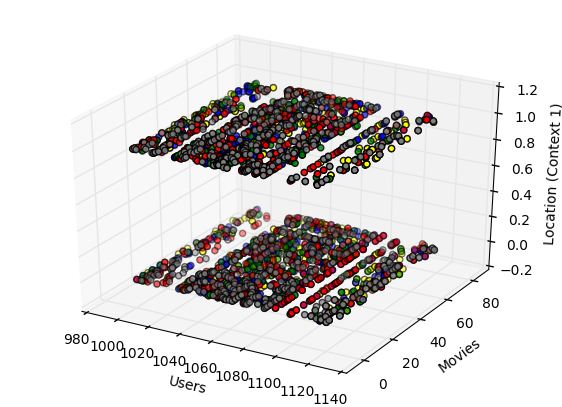

In [15]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataplot[dataplot.rating==0.2].iloc[:,0], dataplot[dataplot.rating==0.2].iloc[:,1], dataplot[dataplot.rating==0.2].iloc[:,4], c='yellow', marker='o')
ax.scatter(dataplot[dataplot.rating==0.4].iloc[:,0], dataplot[dataplot.rating==0.4].iloc[:,1], dataplot[dataplot.rating==0.4].iloc[:,4], c='green', marker='o')
ax.scatter(dataplot[dataplot.rating==0.6].iloc[:,0], dataplot[dataplot.rating==0.6].iloc[:,1], dataplot[dataplot.rating==0.6].iloc[:,4], c='blue', marker='o')
ax.scatter(dataplot[dataplot.rating==0.8].iloc[:,0], dataplot[dataplot.rating==0.8].iloc[:,1], dataplot[dataplot.rating==0.8].iloc[:,4], c='red', marker='o')
ax.scatter(dataplot[dataplot.rating==1].iloc[:,0], dataplot[dataplot.rating==1].iloc[:,1], dataplot[dataplot.rating==1].iloc[:,4], c='grey', marker='o')
ax.set_xlabel("Users")
ax.set_ylabel("Movies")
ax.set_zlabel("Location (Context 1)")
#ax.text(30000, 1500000, 7, "Tensor Visualization", color='red')

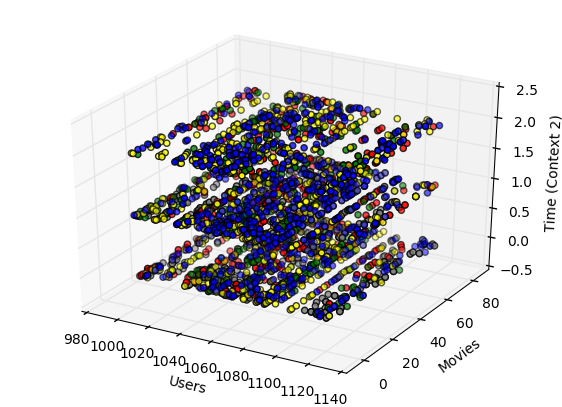

In [16]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataplot[dataplot.rating==0.2].iloc[:,0], dataplot[dataplot.rating==0.2].iloc[:,1], dataplot[dataplot.rating==0.2].iloc[:,5], c='red', marker='o')
ax.scatter(dataplot[dataplot.rating==0.4].iloc[:,0], dataplot[dataplot.rating==0.4].iloc[:,1], dataplot[dataplot.rating==0.4].iloc[:,5], c='green', marker='o')
ax.scatter(dataplot[dataplot.rating==0.6].iloc[:,0], dataplot[dataplot.rating==0.6].iloc[:,1], dataplot[dataplot.rating==0.6].iloc[:,5], c='blue', marker='o')
ax.scatter(dataplot[dataplot.rating==0.8].iloc[:,0], dataplot[dataplot.rating==0.8].iloc[:,1], dataplot[dataplot.rating==0.8].iloc[:,5], c='yellow', marker='o')
ax.scatter(dataplot[dataplot.rating==1].iloc[:,0], dataplot[dataplot.rating==1].iloc[:,1], dataplot[dataplot.rating==1].iloc[:,4], c='grey', marker='o')
ax.set_xlabel("Users")
ax.set_ylabel("Movies")
ax.set_zlabel("Time (Context 2)")
#ax.text(30000, 1500000, 7, "Tensor Visualization", color='red')

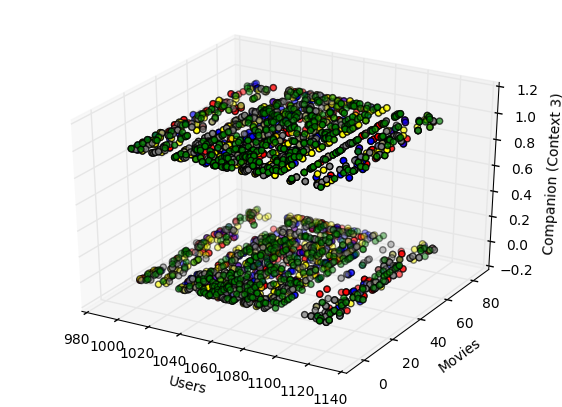

In [17]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataplot[dataplot.rating==0.2].iloc[:,0], dataplot[dataplot.rating==0.2].iloc[:,1], dataplot[dataplot.rating==0.2].iloc[:,3], c='red', marker='o')
ax.scatter(dataplot[dataplot.rating==0.4].iloc[:,0], dataplot[dataplot.rating==0.4].iloc[:,1], dataplot[dataplot.rating==0.4].iloc[:,3], c='blue', marker='o')
ax.scatter(dataplot[dataplot.rating==0.6].iloc[:,0], dataplot[dataplot.rating==0.6].iloc[:,1], dataplot[dataplot.rating==0.6].iloc[:,3], c='green', marker='o')
ax.scatter(dataplot[dataplot.rating==0.8].iloc[:,0], dataplot[dataplot.rating==0.8].iloc[:,1], dataplot[dataplot.rating==0.8].iloc[:,3], c='yellow', marker='o')
ax.scatter(dataplot[dataplot.rating==1].iloc[:,0], dataplot[dataplot.rating==1].iloc[:,1], dataplot[dataplot.rating==1].iloc[:,4], c='grey', marker='o')
ax.set_xlabel("Users")
ax.set_ylabel("Movies")
ax.set_zlabel("Companion (Context 3)")
#ax.text(30000, 1500000, 7, "Tensor Visualization", color='red')

# Applying Decomposition on 3D tensors

In [20]:
factors_loc= tucker(tensor_loc , ranks=[35,35,2])

In [21]:
factors_loc[0].shape

(35, 35, 2)

In [22]:
U1 = factors_loc[1][0]
I1 = factors_loc[1][1]
C1 = factors_loc[1][2]

In [24]:
U1.shape


(81, 35)

In [25]:
I1.shape


(79, 35)

In [26]:
C1.shape

(2, 2)

In [27]:
factors_tim= tucker(tensor_tim , ranks=[35,35,2])

In [28]:
U2 = factors_tim[1][0]
I2 = factors_tim[1][1]
C2 = factors_tim[1][2]

In [50]:
factors_com = tucker(tensor_com , ranks=[35,35,3])

In [51]:
U3 = factors_com[1][0]
I3 = factors_com[1][1]
C3 = factors_com[1][2]

# Clustering Users

In [52]:
wcss = []
for i in range(1,81):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(U1)
    wcss.append(kmeans.inertia_)

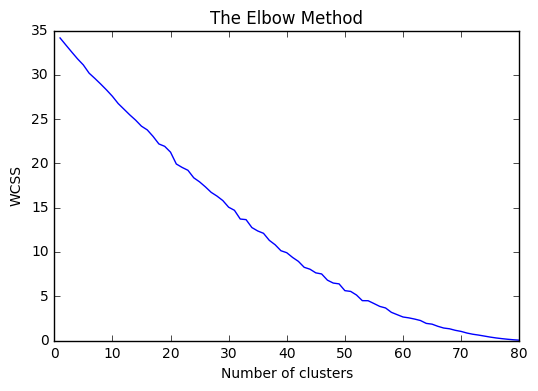

In [53]:
plt.plot(range(1, 81), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
kmeans = KMeans(n_clusters=20, random_state=0)
y1 = kmeans.fit_predict(U1)
kmeans = KMeans(n_clusters=30, random_state=0)
y2 = kmeans.fit_predict(U1)
kmeans = KMeans(n_clusters=40, random_state=0)
y3 = kmeans.fit_predict(U1)
kmeans = KMeans(n_clusters=50, random_state=0)
y4 = kmeans.fit_predict(U1)

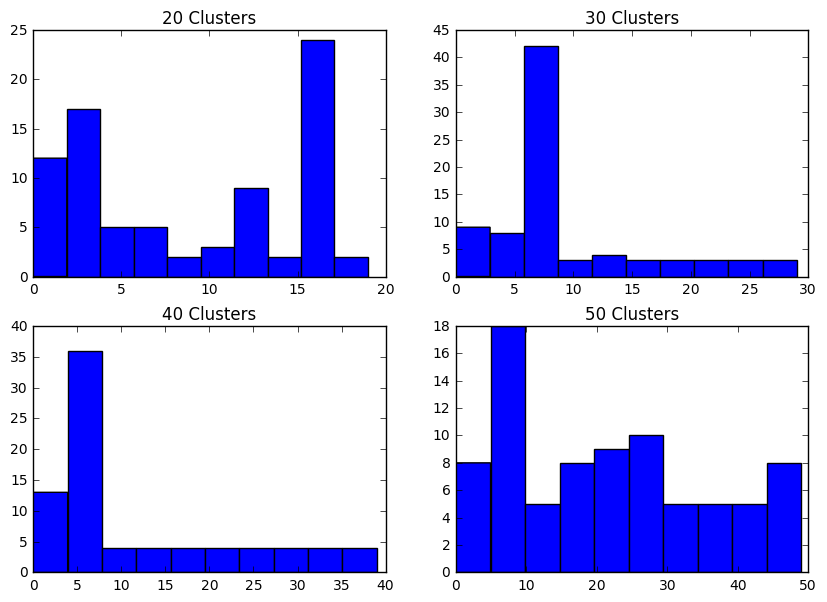

In [55]:
fig, ax = plt.subplots(2,2, figsize=(10, 7))
ax[0,0].hist(y1)
ax[0,0].set_title("20 Clusters")
ax[0,1].hist(y2)
ax[0,1].set_title("30 Clusters")
ax[1,0].hist(y3)
ax[1,0].set_title("40 Clusters")
ax[1,1].hist(y4)
ax[1,1].set_title("50 Clusters")

In [56]:
wcss = []
for i in range(1,81):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(U2)
    wcss.append(kmeans.inertia_)

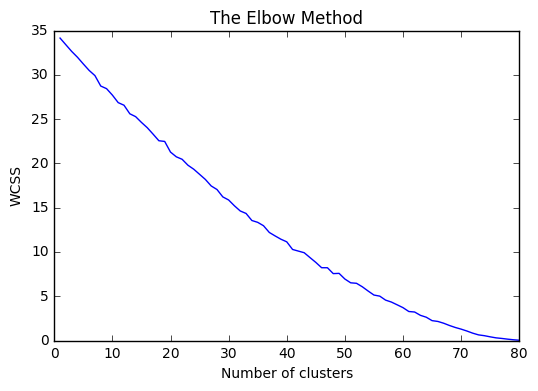

In [57]:
plt.plot(range(1, 81), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
kmeans = KMeans(n_clusters=20, random_state=0)
y5 = kmeans.fit_predict(U2)
kmeans = KMeans(n_clusters=30, random_state=0)
y6 = kmeans.fit_predict(U2)
kmeans = KMeans(n_clusters=40, random_state=0)
y7 = kmeans.fit_predict(U2)
kmeans = KMeans(n_clusters=50, random_state=0)
y8 = kmeans.fit_predict(U2)

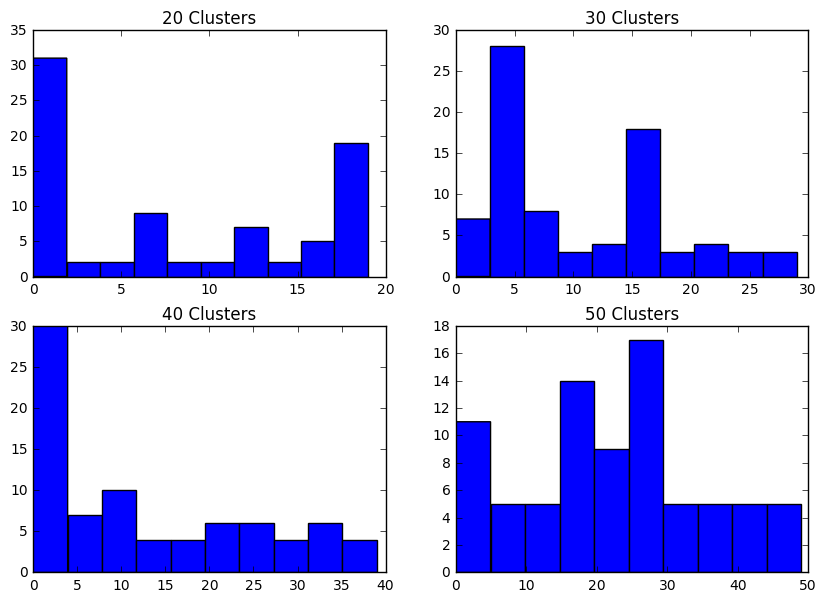

In [59]:
fig, ax = plt.subplots(2,2, figsize=(10, 7))
ax[0,0].hist(y5)
ax[0,0].set_title("20 Clusters")
ax[0,1].hist(y6)
ax[0,1].set_title("30 Clusters")
ax[1,0].hist(y7)
ax[1,0].set_title("40 Clusters")
ax[1,1].hist(y8)
ax[1,1].set_title("50 Clusters")

In [60]:
wcss = []
for i in range(1,81):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(U3)
    wcss.append(kmeans.inertia_)

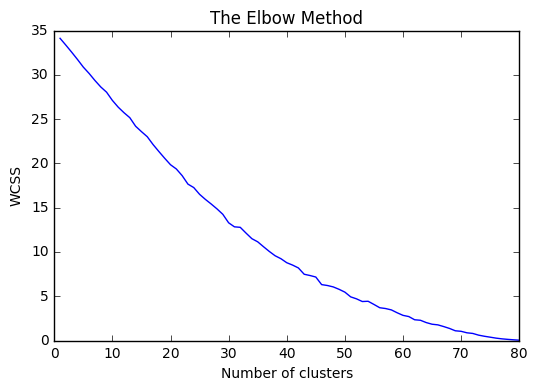

In [61]:
plt.plot(range(1, 81), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
kmeans = KMeans(n_clusters=20, random_state=0)
y9 = kmeans.fit_predict(U3)
kmeans = KMeans(n_clusters=30, random_state=0)
y10 = kmeans.fit_predict(U3)
kmeans = KMeans(n_clusters=40, random_state=0)
y11 = kmeans.fit_predict(U3)
kmeans = KMeans(n_clusters=50, random_state=0)
y12 = kmeans.fit_predict(U3)

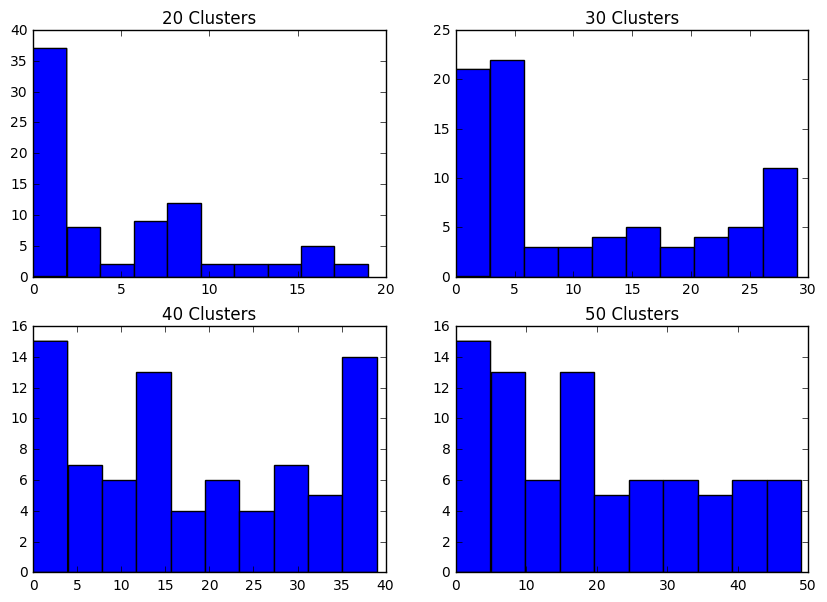

In [68]:
fig, ax = plt.subplots(2,2, figsize=(10, 7))
ax[0,0].hist(y9)
ax[0,0].set_title("20 Clusters")
ax[0,1].hist(y10)
ax[0,1].set_title("30 Clusters")
ax[1,0].hist(y11)
ax[1,0].set_title("40 Clusters")
ax[1,1].hist(y12)
ax[1,1].set_title("50 Clusters")

# Recommending

In [72]:
# For Location Context
current_user = 1035 ############################################ input user ##################
index_user = map_users[current_user]
cluster_user = y4[index_user]

In [73]:
sim_user_id = []
for i in range(len(y4)):
    if(y4[i]==cluster_user and user_id[i]!=current_user):
        sim_user_id.append(user_id[i])

In [75]:
cluster_user

8

In [76]:
y4

array([25, 46, 25, 12, 22,  2,  8, 14, 22, 46, 44,  3, 38, 18, 33, 22, 31,
        5, 22, 15,  9, 10, 25,  8, 40, 47, 11,  8, 28, 13, 37, 34,  0,  8,
        1,  5, 49, 45,  1, 47, 26, 43, 48,  8, 25, 42, 22, 16,  8, 39, 27,
        8,  8, 25, 41, 18, 17, 18, 30,  8, 47, 20,  8,  7, 24,  6,  8, 19,
       29, 36, 35,  8,  4, 21, 18, 32,  4, 23,  8, 25,  0])

In [74]:
sim_user_id

[1007, 1040, 1046, 1056, 1061, 1064, 1065, 1074, 1077, 1084, 1107, 1119]

In [77]:
sim_user_id.append(current_user)

In [78]:
current_context = 1 ################### input context ##############


In [79]:
index_context = map_loc[current_context]

In [81]:
#Slicing Matrix
matrix_context = tensor_loc[:,:,index_context]

In [83]:
cluster=[]
for i in range(len(user_id)):
    if y4[i]==cluster_user and i!=index_user :
        cluster.append(i)


In [84]:
len(cluster)

12

In [85]:
similar_users = []
for i in cluster:
    similar_users.append(matrix_context[i])
su = similar_users.copy()
su.append(matrix_context[map_users[current_user]])

In [86]:
relevant_items=[]
count = 0
for i in range(len(item_id)):
    for j in range(len(cluster)):
        if(similar_users[j][i]>0.5):
            count = count + 1
    relevant_items.append(count)
    count = 0

In [87]:
itemx=[]
for i in range(len(relevant_items)):
    temp=[]
    temp.append(item_id[i])
    temp.append(relevant_items[i])
    itemx.append(temp)

In [88]:
itemx = np.array(itemx)
itemx

array([['tt0088763', '0'],
       ['tt0111161', '2'],
       ['tt0120338', '0'],
       ['tt0133093', '2'],
       ['tt0211915', '1'],
       ['tt0266543', '3'],
       ['tt0362165', '0'],
       ['tt0378194', '0'],
       ['tt0405422', '0'],
       ['tt0462538', '0'],
       ['tt1232829', '3'],
       ['tt1453405', '0'],
       ['tt1707386', '1'],
       ['tt0109830', '0'],
       ['tt0114369', '1'],
       ['tt0367594', '0'],
       ['tt0382625', '0'],
       ['tt0993846', '0'],
       ['tt2557490', '1'],
       ['tt3793764', '3'],
       ['tt0110357', '0'],
       ['tt0114148', '0'],
       ['tt0120912', '1'],
       ['tt0454876', '2'],
       ['tt1099212', '1'],
       ['tt1291150', '1'],
       ['tt0110475', '1'],
       ['tt0125439', '0'],
       ['tt0138097', '0'],
       ['tt0181689', '0'],
       ['tt0289879', '0'],
       ['tt0293662', '1'],
       ['tt0319262', '2'],
       ['tt0327084', '0'],
       ['tt0489099', '1'],
       ['tt0800369', '3'],
       ['tt0945513', '0'],
 

In [89]:
# sorting in reverse(top 10 iStems)
itemx = itemx[itemx[:,1].argsort()[::-1]]
itemx[0:10, :]
### item_ids

array([['tt1657301', '8'],
       ['tt0800369', '3'],
       ['tt3793764', '3'],
       ['tt1375666', '3'],
       ['tt0356910', '3'],
       ['tt1232829', '3'],
       ['tt0266543', '3'],
       ['tt0319262', '2'],
       ['tt0454876', '2'],
       ['tt2251217', '2']], 
      dtype='<U9')

#  Evaluating

In [99]:
su_mean=[]
count=0
mean=0
for i in range(len(su)):
    for j in range(len(item_id)):
        if su[i][j]:
            count = count + 1
            mean = mean + su[i][j]
    if mean and count:
        su_mean.append(mean/count)
    else:
        su_mean.append(0)
    mean=0
    count=0

In [100]:
import math
corr_matrix=[]
corr_m = []
sumxy=0
sumyy2=0
sumxx2=0
corr=0
for i in range(len(su)):
    for j in range(len(su)):
        for k in range(len(item_id)):
            if su[i][k] and su[j][k]:
                sumxy= sumxy + (su[i][k]-su_mean[i])*(su[j][k]-su_mean[j])
                sumxx2= sumxx2 + (su[i][k]-su_mean[i])*(su[i][k]-su_mean[i])
                sumyy2= sumyy2 + (su[j][k]-su_mean[j])*(su[j][k]-su_mean[j])
        if sumxx2 and sumyy2 :
            corr=sumxy/math.sqrt(sumxx2*sumyy2)
        else:
            corr=0
        corr_m.append(corr)
        sumxy=0
        sumyy2=0
        sumxx2=0
    corr_matrix.append(corr_m)
    corr_m = []

In [101]:
corr_matrix = np.array(corr_matrix)
corr_matrix

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.11043153,  0.        , -1.        ,  0.        ,
         1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  1.        ,  0.        ,  0.98125072,
         1.        ,  0.19076419,  1.        ,  0.        , -1.        ,
         0.7739573 , -0.95606664,  0.7739573 ],
       [ 0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         1.        ,  1.        ,  1.        , -0.86824314,  0.        ,
        -1.        ,  0.        ,  0.96901793],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.98125072,  1.        ,  0.        ,  1.        ,
         0.93979342,  0.23587005,  0.94174191,  0.        ,  0.        ,
         1.        , -0.93979342,  1.        ],
       [ 1.        ,  1.      

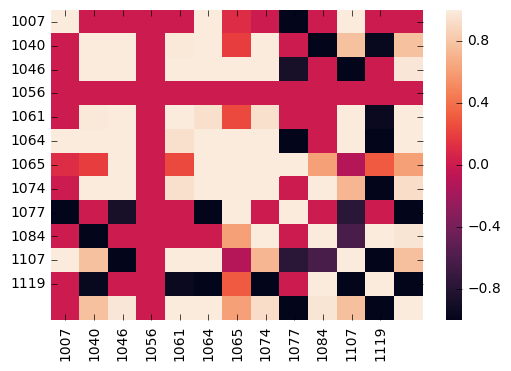

In [102]:
import seaborn as sns
sns.heatmap(corr_matrix, xticklabels=sim_user_id, yticklabels=sim_user_id)

In [103]:
similarities = corr_matrix[12]
similarities

array([ 0.        ,  0.7739573 ,  0.96901793,  0.        ,  1.        ,
        1.        ,  0.61394061,  0.92684372, -1.        ,  0.96206393,
        0.76608842, -1.        ,  1.        ])

In [104]:
similarities = similarities[:-1]
similarities

array([ 0.        ,  0.7739573 ,  0.96901793,  0.        ,  1.        ,
        1.        ,  0.61394061,  0.92684372, -1.        ,  0.96206393,
        0.76608842, -1.        ])

In [105]:
sim_user_id = sim_user_id[:-1]

In [106]:
predicted_ratings=[]

for i in range(len(item_id)):
    temp = 0
    summ = 0
    for j in range(len(similar_users)):
        if similar_users[j][i]:
            summ = summ + similarities[j]
            temp = temp + (similarities[j]*(similar_users[j][i]-su_mean[j]))
    if summ:
        pred = su_mean[-1] + (temp/summ)
    else:
        pred = su_mean[-1] + temp
    if pred >1:
        pred = 1
    elif pred<=0:
        pred = 0.2
        
    predicted_ratings.append(pred)
    

In [107]:
for i in range(len(item_id)):
    print(su[12][i],',',predicted_ratings[i])

0.0 , 0.711111111111
1.0 , 0.800340918166
0.4 , 0.688888888889
1.0 , 0.763562682039
0.0 , 0.955555555556
0.0 , 0.863375240335
0.0 , 1
0.0 , 0.492824383897
0.0 , 0.711111111111
0.0 , 0.286111111111
0.0 , 0.74633297918
0.0 , 0.711111111111
0.0 , 0.636111111111
0.0 , 0.711111111111
0.6 , 0.559505901081
0.0 , 0.711111111111
0.0 , 0.711111111111
0.0 , 0.491111111111
0.0 , 0.653542801342
0.0 , 0.861111111111
0.0 , 0.711111111111
0.0 , 0.355555555556
0.0 , 0.711111111111
0.0 , 0.893176445879
0.0 , 0.836111111111
0.0 , 0.358713162373
0.0 , 0.836111111111
0.0 , 0.711111111111
0.0 , 0.711111111111
0.0 , 0.711111111111
0.0 , 0.711111111111
0.0 , 0.625396825397
0.0 , 1
0.0 , 0.711111111111
0.0 , 0.666666666667
0.0 , 1
0.0 , 0.711111111111
0.0 , 0.636111111111
1.0 , 1
0.0 , 0.783891547858
1.0 , 1
0.4 , 0.636111111111
0.4 , 0.711111111111
0.0 , 0.316408928703
0.0 , 0.836111111111
0.0 , 0.711111111111
0.0 , 0.711111111111
0.0 , 0.711111111111
0.0 , 0.711111111111
0.0 , 0.711111111111
0.0 , 0.68280470

In [109]:
err = 0
count = 0
for i in range(len(su[len(su)-1])):
    if su[len(su)-1][i]:
        err = err + abs(su[len(su)-1][i]-predicted_ratings[i])
        count = count + 1
    if count:
        mae = err/count
    else:
        mae = 100000000000000

In [110]:
mae

0.15820141343737451

# Recommending for Time Context 

In [111]:
current_user = 1035 ############################################ input user ##################
index_user = map_users[current_user]

cluster_user = y8[index_user]

In [112]:
sim_user_id = []
for i in range(len(y8)):
    if(y8[i]==cluster_user and user_id[i]!=current_user):
        sim_user_id.append(user_id[i])

In [113]:
cluster_user

16

In [114]:
y8

array([24, 24, 27, 33, 47, 14, 12, 27, 42, 48, 24, 36,  1, 16, 19,  4, 34,
       22,  0, 18, 15, 17, 43, 16,  0, 27,  6, 16, 39, 30, 29, 23, 27,  0,
       16, 22, 27, 32,  9,  5, 44,  0, 38, 45, 24, 21, 27, 49, 16,  8, 35,
       27, 27,  4, 16, 16, 13, 16, 25, 16, 27, 26,  2, 37, 20,  7, 27, 10,
        1, 28, 46, 27,  0, 11, 16, 40, 31,  3, 27, 41, 27])

In [115]:
sim_user_id

[1018, 1040, 1047, 1061, 1067, 1068, 1070, 1074, 1113]

In [116]:
sim_user_id.append(current_user)

In [131]:
current_context = 0 ################### input context ##############

In [132]:
index_context = map_tim[current_context]
#Slicing Matrix
matrix_context = tensor_tim[:,:,index_context]

In [133]:
cluster=[]
for i in range(len(user_id)):
    if y8[i]==cluster_user and i!=index_user :
        cluster.append(i)

In [134]:
len(cluster)

9

In [135]:
similar_users = []
for i in cluster:
    similar_users.append(matrix_context[i])
su = similar_users.copy()
su.append(matrix_context[map_users[current_user]])

In [136]:
relevant_items=[]
count = 0
for i in range(len(item_id)):
    for j in range(len(cluster)):
        if(similar_users[j][i]>0.5):
            count = count + 1
    relevant_items.append(count)
    count = 0

In [137]:
itemx=[]
for i in range(len(relevant_items)):
    temp=[]
    temp.append(item_id[i])
    temp.append(relevant_items[i])
    itemx.append(temp)

In [138]:
itemx = np.array(itemx)
itemx

array([['tt0088763', '1'],
       ['tt0111161', '5'],
       ['tt0120338', '2'],
       ['tt0133093', '4'],
       ['tt0211915', '1'],
       ['tt0266543', '2'],
       ['tt0362165', '0'],
       ['tt0378194', '1'],
       ['tt0405422', '2'],
       ['tt0462538', '1'],
       ['tt1232829', '3'],
       ['tt1453405', '0'],
       ['tt1707386', '0'],
       ['tt0109830', '4'],
       ['tt0114369', '2'],
       ['tt0367594', '1'],
       ['tt0382625', '0'],
       ['tt0993846', '0'],
       ['tt2557490', '0'],
       ['tt3793764', '3'],
       ['tt0110357', '3'],
       ['tt0114148', '0'],
       ['tt0120912', '0'],
       ['tt0454876', '1'],
       ['tt1099212', '0'],
       ['tt1291150', '0'],
       ['tt0110475', '0'],
       ['tt0125439', '0'],
       ['tt0138097', '0'],
       ['tt0181689', '0'],
       ['tt0289879', '0'],
       ['tt0293662', '0'],
       ['tt0319262', '0'],
       ['tt0327084', '0'],
       ['tt0489099', '0'],
       ['tt0800369', '0'],
       ['tt0945513', '0'],
 

In [139]:
# sorting in reverse(top 10 iStems)
itemx = itemx[itemx[:,1].argsort()[::-1]]
itemx[0:10, :]
### item_ids

array([['tt0111161', '5'],
       ['tt1375666', '5'],
       ['tt0133093', '4'],
       ['tt1657301', '4'],
       ['tt0109830', '4'],
       ['tt0110357', '3'],
       ['tt3793764', '3'],
       ['tt1232829', '3'],
       ['tt0114369', '2'],
       ['tt0120338', '2']], 
      dtype='<U9')

# Evaluating for Time Context

In [140]:
su_mean=[]
count=0
mean=0
for i in range(len(su)):
    for j in range(len(item_id)):
        if su[i][j]:
            count = count + 1
            mean = mean + su[i][j]
    if mean and count:
        su_mean.append(mean/count)
    else:
        su_mean.append(0)
    mean=0
    count=0

In [141]:
su_mean

[0.95999999999999996,
 0.55555555555555569,
 0.41538461538461519,
 0.625,
 0.22499999999999998,
 0.56666666666666676,
 0.75384615384615394,
 0.56666666666666676,
 1.0,
 0.64444444444444438]

In [142]:
import math
corr_matrix=[]
corr_m = []
sumxy=0
sumyy2=0
sumxx2=0
corr=0
for i in range(len(su)):
    for j in range(len(su)):
        for k in range(len(item_id)):
            if su[i][k] and su[j][k]:
                sumxy= sumxy + (su[i][k]-su_mean[i])*(su[j][k]-su_mean[j])
                sumxx2= sumxx2 + (su[i][k]-su_mean[i])*(su[i][k]-su_mean[i])
                sumyy2= sumyy2 + (su[j][k]-su_mean[j])*(su[j][k]-su_mean[j])
        if sumxx2 and sumyy2 :
            corr=sumxy/math.sqrt(sumxx2*sumyy2)
        else:
            corr=0
        corr_m.append(corr)
        sumxy=0
        sumyy2=0
        sumxx2=0
    corr_matrix.append(corr_m)
    corr_m = []

In [143]:
corr_matrix = np.array(corr_matrix)
corr_matrix

array([[ 1.        ,  1.        ,  1.        ,  0.        , -1.        ,
        -0.90123012, -0.90882955,  0.        ,  0.        ,  0.68599434],
       [ 1.        ,  1.        ,  0.15523011,  0.98125072, -1.        ,
         1.        ,  0.99915083,  1.        ,  0.        ,  0.7739573 ],
       [ 1.        ,  0.15523011,  1.        , -0.06970715,  0.40949653,
         0.07148488,  0.85373696,  0.27555656,  0.        ,  1.        ],
       [ 0.        ,  0.98125072, -0.06970715,  1.        ,  0.06237829,
        -0.5547002 ,  0.82530726,  0.8       ,  0.        ,  1.        ],
       [-1.        , -1.        ,  0.40949653,  0.06237829,  1.        ,
         0.33333333, -0.82530726, -1.        ,  0.        ,  0.21693046],
       [-0.90123012,  1.        ,  0.07148488, -0.5547002 ,  0.33333333,
         1.        ,  0.10559678,  0.54588048,  0.        , -0.57539646],
       [-0.90882955,  0.99915083,  0.85373696,  0.82530726, -0.82530726,
         0.10559678,  1.        , -0.21693046

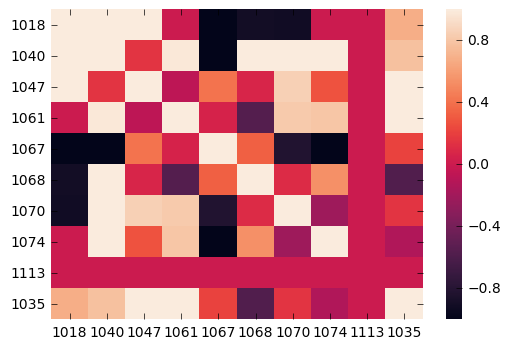

In [144]:
import seaborn as sns
sns.heatmap(corr_matrix, xticklabels=sim_user_id, yticklabels=sim_user_id)

In [146]:
similarities = corr_matrix[9]
similarities = similarities[:-1]
sim_user_id = sim_user_id[:-1]
similarities

array([ 0.68599434,  0.7739573 ,  1.        ,  1.        ,  0.21693046,
       -0.57539646,  0.15120675, -0.13245324,  0.        ])

In [147]:
predicted_ratings=[]

for i in range(len(item_id)):
    temp = 0
    summ = 0
    for j in range(len(similar_users)):
        if similar_users[j][i]:
            summ = summ + similarities[j]
            temp = temp + (similarities[j]*(similar_users[j][i]-su_mean[j]))
    if summ:
        pred = su_mean[-1] + (temp/summ)
    else:
        pred = su_mean[-1] + temp
    if pred >1:
        pred = 1
    elif pred<=0:
        pred = 0.2
        
    predicted_ratings.append(pred)

In [148]:
for i in range(len(item_id)):
    print(su[9][i],',',predicted_ratings[i])

0.0 , 0.82905982906
0.8 , 0.750012673268
0.4 , 0.730816756884
0.8 , 0.802831918786
0.0 , 0.888888888889
0.0 , 0.849742262036
0.0 , 0.0905982905983
0.0 , 0.827345787166
0.0 , 1
0.0 , 0.533566867765
0.0 , 0.761833017038
0.0 , 0.644444444444
0.0 , 0.644444444444
0.0 , 0.596680526195
0.8 , 1
0.0 , 0.684444444444
0.0 , 0.42905982906
0.0 , 0.452156909265
0.0 , 0.644444444444
0.0 , 1
0.0 , 0.2
0.0 , 0.256480715157
0.0 , 0.644444444444
0.0 , 0.688888888889
0.0 , 0.449741642831
0.0 , 0.644444444444
0.0 , 0.644444444444
0.0 , 0.644444444444
0.0 , 0.644444444444
0.0 , 0.644444444444
0.0 , 0.644444444444
0.0 , 0.644444444444
0.0 , 0.288888888889
0.0 , 0.644444444444
0.0 , 0.42905982906
0.0 , 0.644444444444
0.0 , 0.42905982906
0.0 , 0.384604156968
0.8 , 1
0.0 , 0.42905982906
0.8 , 0.984849485289
0.4 , 0.644444444444
0.4 , 0.644444444444
0.0 , 0.458583821057
0.0 , 0.42905982906
0.0 , 0.644444444444
0.0 , 0.0920126517445
0.0 , 0.644444444444
0.0 , 0.644444444444
0.0 , 0.644444444444
0.0 , 0.644444444

In [149]:
err = 0
count = 0
for i in range(len(su[len(su)-1])):
    if su[len(su)-1][i]:
        err = err + abs(su[len(su)-1][i]-predicted_ratings[i])
        count = count + 1
    if count:
        mae = err/count
    else:
        mae = 100000000000000

In [150]:
mae

0.17131320233600267

#  Recommending for Comp Context

In [151]:
current_user = 1035 ############################################ input user ##################
index_user = map_users[current_user]
cluster_user = y11[index_user]

In [152]:
sim_user_id = []
for i in range(len(y11)):
    if(y11[i]==cluster_user and user_id[i]!=current_user):
        sim_user_id.append(user_id[i])

In [153]:
cluster_user

0

In [154]:
y11

array([39, 39, 39, 33, 18, 37,  0, 20, 13, 13,  0,  2, 38, 39, 13,  4, 13,
       28, 13, 24, 12,  5, 34,  0, 21,  0, 30, 13, 25, 22,  1,  3,  4,  0,
       14, 28,  9, 30, 32, 35, 39,  9, 26, 29, 39, 19,  9, 13,  0, 16, 34,
       30,  3,  4, 39, 14,  7, 14, 39,  0, 20, 10, 14, 15, 31,  8, 39, 11,
       36, 23,  4,  3, 37, 27,  0,  0, 20, 17,  3,  6, 39])

In [155]:
sim_user_id

[1007, 1014, 1038, 1046, 1061, 1074, 1113, 1114]

In [156]:
sim_user_id.append(current_user)

In [157]:
current_context = 0 ################### input context ##############

In [158]:
index_context = map_com[current_context]
#Slicing Matrix
matrix_context = tensor_com[:,:,index_context]

In [162]:
cluster=[]
for i in range(len(user_id)):
    if y11[i]==cluster_user and i!=index_user :
        cluster.append(i)

In [163]:
len(cluster)

8

In [164]:
similar_users = []
for i in cluster:
    similar_users.append(matrix_context[i])
su = similar_users.copy()
su.append(matrix_context[map_users[current_user]])

In [165]:
relevant_items=[]
count = 0
for i in range(len(item_id)):
    for j in range(len(cluster)):
        if(similar_users[j][i]>0.5):
            count = count + 1
    relevant_items.append(count)
    count = 0

In [166]:
itemx=[]
for i in range(len(relevant_items)):
    temp=[]
    temp.append(item_id[i])
    temp.append(relevant_items[i])
    itemx.append(temp)

In [167]:
itemx = np.array(itemx)
itemx

array([['tt0088763', '1'],
       ['tt0111161', '2'],
       ['tt0120338', '2'],
       ['tt0133093', '1'],
       ['tt0211915', '0'],
       ['tt0266543', '3'],
       ['tt0362165', '0'],
       ['tt0378194', '0'],
       ['tt0405422', '0'],
       ['tt0462538', '0'],
       ['tt1232829', '0'],
       ['tt1453405', '0'],
       ['tt1707386', '0'],
       ['tt0109830', '1'],
       ['tt0114369', '1'],
       ['tt0367594', '0'],
       ['tt0382625', '0'],
       ['tt0993846', '1'],
       ['tt2557490', '0'],
       ['tt3793764', '3'],
       ['tt0110357', '0'],
       ['tt0114148', '0'],
       ['tt0120912', '1'],
       ['tt0454876', '0'],
       ['tt1099212', '2'],
       ['tt1291150', '0'],
       ['tt0110475', '1'],
       ['tt0125439', '1'],
       ['tt0138097', '0'],
       ['tt0181689', '0'],
       ['tt0289879', '0'],
       ['tt0293662', '0'],
       ['tt0319262', '0'],
       ['tt0327084', '0'],
       ['tt0489099', '1'],
       ['tt0800369', '0'],
       ['tt0945513', '0'],
 

In [168]:
# sorting in reverse(top 10 iStems)
itemx = itemx[itemx[:,1].argsort()[::-1]]
itemx[0:10, :]
### item_ids

array([['tt1375666', '6'],
       ['tt0266543', '3'],
       ['tt3793764', '3'],
       ['tt0111161', '2'],
       ['tt0120338', '2'],
       ['tt1657301', '2'],
       ['tt1099212', '2'],
       ['tt0441773', '1'],
       ['tt0232500', '1'],
       ['tt0120912', '1']], 
      dtype='<U9')

# Evaluating for Companion Context

In [169]:
su_mean=[]
count=0
mean=0
for i in range(len(su)):
    for j in range(len(item_id)):
        if su[i][j]:
            count = count + 1
            mean = mean + su[i][j]
    if mean and count:
        su_mean.append(mean/count)
    else:
        su_mean.append(0)
    mean=0
    count=0

In [170]:
su_mean

[0.20000000000000004,
 0.85999999999999999,
 0.44000000000000006,
 0.47499999999999998,
 0.57499999999999996,
 0.50000000000000011,
 0.84999999999999998,
 0.67500000000000004,
 0.89999999999999991]

In [171]:
import math
corr_matrix=[]
corr_m = []
sumxy=0
sumyy2=0
sumxx2=0
corr=0
for i in range(len(su)):
    for j in range(len(su)):
        for k in range(len(item_id)):
            if su[i][k] and su[j][k]:
                sumxy= sumxy + (su[i][k]-su_mean[i])*(su[j][k]-su_mean[j])
                sumxx2= sumxx2 + (su[i][k]-su_mean[i])*(su[i][k]-su_mean[i])
                sumyy2= sumyy2 + (su[j][k]-su_mean[j])*(su[j][k]-su_mean[j])
        if sumxx2 and sumyy2 :
            corr=sumxy/math.sqrt(sumxx2*sumyy2)
        else:
            corr=0
        corr_m.append(corr)
        sumxy=0
        sumyy2=0
        sumxx2=0
    corr_matrix.append(corr_m)
    corr_m = []

In [172]:
corr_matrix = np.array(corr_matrix)
corr_matrix

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  1.        ,  0.        , -0.2900074 ,
         0.        ,  0.24253563, -0.78311085, -1.        ],
       [ 0.        ,  1.        ,  1.        ,  1.        ,  0.93608392,
         0.98058068,  1.        ,  1.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.        , -0.2900074 ,  0.93608392,  1.        ,  1.        ,
         0.9701425 ,  1.        ,  0.80389454,  1.        ],
       [ 0.        ,  0.        ,  0.98058068,  1.        ,  0.9701425 ,
         1.        ,  1.        ,  1.        ,  0.68313005],
       [ 1.        ,  0.24253563,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.        , -0.78311085,  1.        ,  1.        ,  0

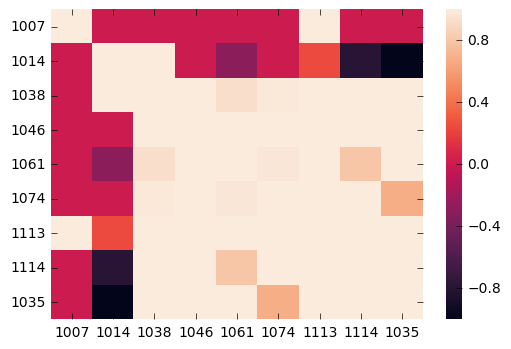

In [173]:
import seaborn as sns
sns.heatmap(corr_matrix, xticklabels=sim_user_id, yticklabels=sim_user_id)

In [174]:
similarities = corr_matrix[8]
similarities = similarities[:-1]
sim_user_id = sim_user_id[:-1]
similarities

array([ 0.        , -1.        ,  1.        ,  1.        ,  1.        ,
        0.68313005,  1.        ,  1.        ])

In [175]:
predicted_ratings=[]

for i in range(len(item_id)):
    temp = 0
    summ = 0
    for j in range(len(similar_users)):
        if similar_users[j][i]:
            summ = summ + similarities[j]
            temp = temp + (similarities[j]*(similar_users[j][i]-su_mean[j]))
    if summ:
        pred = su_mean[-1] + (temp/summ)
    else:
        pred = su_mean[-1] + temp
    if pred >1:
        pred = 1
    elif pred<=0:
        pred = 0.2
        
    predicted_ratings.append(pred)

In [177]:
for i in range(len(item_id)):
    print(su[8][i],',',predicted_ratings[i])

0.0 , 1
1.0 , 1
0.0 , 1
1.0 , 0.84
0.0 , 0.9
0.0 , 0.945
0.0 , 0.825
0.0 , 0.825
0.0 , 0.9
0.0 , 0.525
0.0 , 0.9
0.0 , 0.66
0.0 , 0.9
0.0 , 1
0.8 , 1.0
0.0 , 0.9
0.0 , 0.9
0.0 , 1
0.0 , 0.9
0.0 , 1
0.0 , 0.9
0.0 , 0.9
0.0 , 0.485
0.0 , 0.9
0.0 , 0.71
0.0 , 0.825
0.0 , 1
0.0 , 0.84
0.0 , 0.9
0.0 , 0.9
0.0 , 0.9
0.0 , 0.9
0.0 , 0.9
0.0 , 0.9
0.0 , 0.84
0.0 , 0.9
0.0 , 0.9
0.0 , 0.65
1.0 , 1
0.0 , 0.9
1.0 , 1
0.0 , 0.825
0.0 , 0.9
0.0 , 0.675
0.0 , 0.9
0.0 , 1
0.0 , 0.84
0.0 , 0.9
0.0 , 0.9
0.0 , 0.9
0.0 , 0.825
0.0 , 0.9
0.0 , 0.9
0.0 , 0.9
0.0 , 0.825
0.0 , 0.635647869255
0.0 , 0.9
0.0 , 0.9
0.0 , 0.65
0.0 , 0.575
0.0 , 0.9
0.0 , 0.8
0.0 , 1.0
0.0 , 0.6
0.0 , 0.9
0.6 , 0.9
0.0 , 0.86
0.0 , 0.9
0.0 , 0.9
0.0 , 0.9
0.0 , 1
0.0 , 1
0.0 , 0.925
0.0 , 0.6
0.0 , 0.9
0.0 , 0.6
0.0 , 0.9
0.0 , 0.9
0.0 , 0.9


In [178]:
err = 0
count = 0
for i in range(len(su[len(su)-1])):
    if su[len(su)-1][i]:
        err = err + abs(su[len(su)-1][i]-predicted_ratings[i])
        count = count + 1
    if count:
        mae = err/count
    else:
        mae = 100000000000000

In [179]:
mae

0.10999999999999995

# Plotting

In [182]:
testsu = []
testpr = []
for i in range(len(su[8])):
    if su[8][i]:
        testsu.append(su[8][i])
        testpr.append(predicted_ratings[i])

In [183]:
testpr = [i*5 for i in testpr]
testsu = [i*5 for i in testsu]

In [184]:
for i in range(len(testpr)):
    if testpr[i]==0:
        testpr[i]=1

In [185]:
testpr = np.round(testpr)

In [186]:
testpr

array([ 5.,  4.,  5.,  5.,  5.,  4.])

In [187]:
testsu

[5.0, 5.0, 4.0, 5.0, 5.0, 3.0]

In [188]:
item_plot =[]
for i in range(len(item_id)):
    if(su[8][i] and predicted_ratings[i]):
        item_plot.append(item_id[i])

In [189]:
item_plot

['tt0111161', 'tt0133093', 'tt0114369', 'tt1375666', 'tt1657301', 'tt0169547']

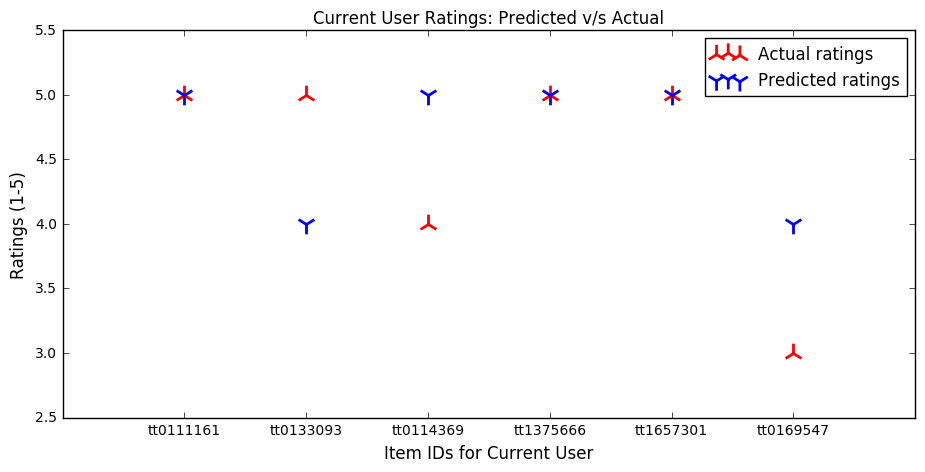

In [190]:
plt.figure(figsize=(11,5))
plt.scatter(np.arange(0,len(testsu)), testsu, s=200, color="red", marker='2', linewidth=2)
plt.scatter(np.arange(0,len(testpr)), testpr, s=200, marker='1', linewidth=2)
plt.xlabel("Item IDs for Current User", fontsize=12)
plt.xticks(np.arange(0,len(testsu)), item_plot)
plt.ylabel("Ratings (1-5)", fontsize=12)
plt.legend(["Actual ratings","Predicted ratings"])
plt.title("Current User Ratings: Predicted v/s Actual")
plt.show()